In [1]:
# torchvision.dataset = get dataset and dataloading for computer vision
# torchvision.models = using pre trained models for our own
# torchvision transforms = functions for manipulating images
# torch.utls.data.Dataset = base dataset class to create our own dataset


In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms 
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

#check version
print(torch.__version__)
print(torchvision.__version__)

1.12.0+cu113
0.13.0+cu113


## Getting the dataset

In [7]:
# We are going to use FashionMNIST dataset for this learning
# setup training data

train_data = datasets.FashionMNIST(
    root="data", # where we want to save the dataset to
    train=True, # we want the training dataset
    download=True, # we want to download the dataset
    transform=torchvision.transforms.ToTensor(), # convert the images to tensors as need
    target_transform=None # how doo we wantt to transform the labels
)

test_data = datasets.FashionMNIST(
    root="Data", 
    train=False, 
    download=True, 
    transform=ToTensor(), 
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to Data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Data/FashionMNIST/raw



In [8]:
len(train_data), len(test_data)

(60000, 10000)

In [9]:
# See the first training example
# we find the images to tensor. 
# PIL image - Python Image Library
# check to_transform documentation
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [10]:
# check the target classes 
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [11]:
# getting ids for the different classes

class_to_idx = train_data.class_to_idx
class_to_idx

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

In [12]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [13]:
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

# grayscale - so 1 color channel

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


## Visualize data as image

Text(0.5, 1.0, '9')

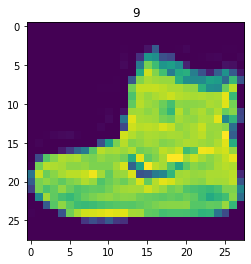

In [14]:
plt.imshow(image.squeeze()) # matplotlib expects only the image W and H, so we get rid of the extra color dim
# squeeze removes the unit dimension
plt.title(label) # only 28 * 28 image so very pixelated looking

Text(0.5, 1.0, 'Ankle boot')

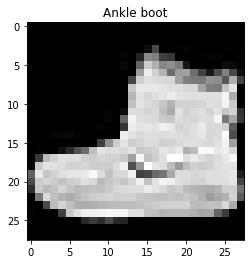

In [15]:
plt.imshow(image.squeeze(), cmap='gray') # matplotlib expects only the image W and H, so we get rid of the extra color dim
# squeeze removes the unit dimension
plt.title(class_names[label]) # only 28 * 28 image so very pixelated looking

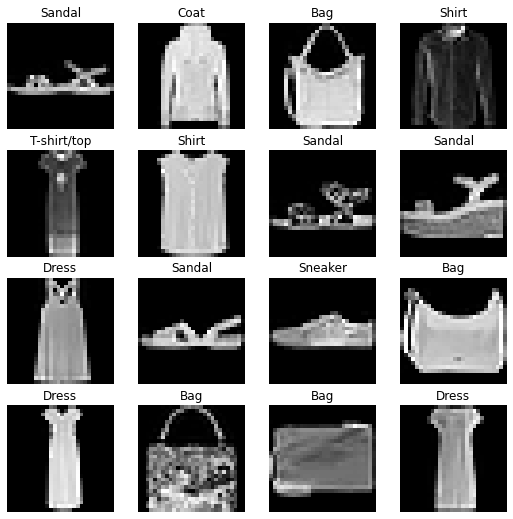

In [16]:
# Plotting 16 random images
torch.manual_seed(750)
fig=plt.figure(figsize=(9, 9))
rows, cols = 4, 4 # we are going to get 16 images
for i in range(1, rows*cols+1):
  #print(i)
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  #print(random_idx) # we get different images based on the  seed
  img, label=train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## Prepare dataloader 

In [17]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: Data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## Dataloader to turn the dataset in python iterable

### Turn data into batches or mini batches

#### Lets us take for now mini batches of 32 each
#### the optimizer will update per batch, So the training gets efficient. The batches will be shuffled.



In [28]:
from torch.utils.data import DataLoader # also goes for text and any other datatypes

# set the hyperparam batch size
BATCH_SIZE=32

# Turn the dataset into iterable
train_dataloader=DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader=DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

In [29]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f8d1ccc4290>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8d1ccc4250>)

In [30]:
print(f"Data Loaders: ", train_dataloader, test_dataloader)
print(f"Train Dataloader: , {len(train_dataloader)}, Batches of , {BATCH_SIZE}")
print(f"Test Dataloader:, {len(test_dataloader)}, batches of, {BATCH_SIZE}")

Data Loaders:  <torch.utils.data.dataloader.DataLoader object at 0x7f8d1ccc4290> <torch.utils.data.dataloader.DataLoader object at 0x7f8d1ccc4250>
Train Dataloader: , 1875, Batches of , 32
Test Dataloader:, 313, batches of, 32


In [32]:
# check inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

# train_features_batch will have the training images
# train labels batch will have the image labels meaning what the features together indicate
# iter will get the nextt batch in the iterator

train_features_batch.shape, train_labels_batch.shape
# torc.Size(batch_size, color_channel, height, width), torch.Size(BATCH_SIZE)

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label_size: torch.Size([])


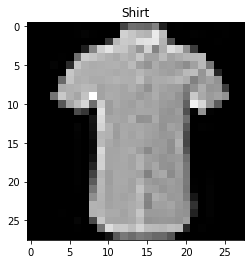

In [33]:
# Show sample
#torch.manual_seed(999)
random_idx= torch.randint(0, len(train_features_batch), size=[1]).item() # creating a random image from the train dataset
img, label= train_features_batch[random_idx], train_labels_batch[random_idx] # getting the random image from the datasett and it particular label
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis=False
print(f"Image size: {img.shape}")
print(f"Label: {label}, label_size: {label.shape}")


## Build a baseline model

Baseline model can be inproved later with experimentation

In [35]:
## Creating a FC flatten layer 

flatten_model = nn.Flatten()

# taking one feature into a different variable
x=train_features_batch[0]

# flattening the input
output=flatten_model(x)

# printing the shape of the first tensor [0] before and after flatteing
print(f"Shape before flattening: , {x.shape}, -> [color_channel, height, width]")
print(f"Shape after flatteing: , {output.shape}, -> [color_channel, height*width]")

Shape before flattening: , torch.Size([1, 28, 28]), -> [color_channel, height, width]
Shape after flatteing: , torch.Size([1, 784]), -> [color_channel, height*width]


In [36]:
output # condense information into a single vector

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [45]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, 
               input_shape: int, 
               hidden_units: int, 
               output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(), 
        nn.Linear(in_features=input_shape, 
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [48]:
torch.manual_seed(42)

## setup model with input params
model_0=FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10, ## how many hidden units for the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [49]:
dummy_x=torch.rand([1, 1, 28, 28])
model_0(dummy_x)

# also check what input shape certain layers expect

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)